In [1]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [162]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 2, 200)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=8)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [163]:
ind = toolbox.individual()
pop = toolbox.population(n=3)

In [172]:
pop[0]

[88, 194, 198, 162, 127, 47, 62, 62]

In [164]:
np.dot(np.array([1,2,3]), np.array([3,4,5]))

26

In [165]:
def eval_poly(individual, yy=20):
    x = [np.cos(individual[0]**2),
         np.cos(individual[1]**0.2), 
         np.sin(individual[2]**0.5), 
         individual[3]**1.5 - np.floor(individual[3]**1.5), 
         np.cos(individual[4]**2),
         np.sin(individual[5]**0.4), 
         np.sin(individual[6]**0.5), 
         individual[7]**1.2 - np.floor(individual[7]**1.2)] 
    temp = [np.dot(x, [-1, -2, 3, 5, 2, -7, 3, -1]) + yy]
    return temp

In [179]:
ind1 = toolbox.individual()
ind1
ind2 = toolbox.individual()
ind2
np.subtract(ind1, ind2)

array([ 25,  85,  68, -71,  42, -23,  37,  30])

In [166]:
toolbox.register("evaluate", eval_poly, yy=-5)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=2, up=200, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [167]:
ind

[128, 170, 107, 36, 164, 171, 134, 76]

In [168]:
toolbox.mutate(ind)

([128, 170, 148, 36, 164, 171, 134, 76],)

In [296]:
def evaluate_ind_with_pre(ind, pre):
    x1 = [np.cos(ind[0]**2),
         np.cos(ind[1]**0.2), 
         np.sin(ind[2]**0.5), 
         ind[3]**1.5 - np.floor(ind[3]**1.5), 
         np.cos(ind[4]**2),
         np.sin(ind[5]**0.4), 
         np.sin(ind[6]**0.5), 
         ind[7]**1.2 - np.floor(ind[7]**1.2)] 
    x2 = [np.cos(pre[0]**2),
         np.cos(pre[1]**0.2), 
         np.sin(pre[2]**0.5), 
         pre[3]**1.5 - np.floor(pre[3]**1.5), 
         np.cos(pre[4]**2),
         np.sin(pre[5]**0.4), 
         np.sin(pre[6]**0.5), 
         pre[7]**1.2 - np.floor(pre[7]**1.2)] 
    temp1 = np.dot(x1, [-1, -2, 3, 5, 2, -7, 3, -1])
    temp2 = np.dot(x2, [-1, -2, 3, 5, 2, -7, 3, -1])
    return [temp1 - temp2]
def evaluate_pops_with_pre(pops, pre):
    fitnesses = [None for i in pops]
    for i, ind in enumerate(pops):
        fitnesses[i] = evaluate_ind_with_pre(ind, pre)
    return fitnesses

In [306]:
pop = toolbox.population(n=50)
pre = pop[0]
pre_fitness = 0
toolbox.register("mate2", tools.cxUniform, indpb=0.1)
toolbox.register("mutate2", tools.mutUniformInt, low=2, up=200, indpb=0.2)
toolbox.register("select2", tools.selTournament, tournsize=5)

best_fitness_eachgen = []
gen_total = 0

In [317]:
# setting up probability to crossover and mutate
CXPB = 0.5
MUTPB = 0.5

GEN = 500

for g in range(GEN):
    gen_total += 1
    # Select the next generation individuals
    offspring = toolbox.select2(pop, len(pop))
    
    # Clone the selected individuals
    offspring = list(map(toolbox.clone, offspring))
    
    # Apply crossover on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate2(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Apply mutation on the offspring
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate2(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with the previous best one
    fitnesses = evaluate_pops_with_pre(offspring, pre)
    #print(fitnesses)
    for ind, fit in zip(offspring, fitnesses):
        #print(fit)
        ind.fitness.values = fit
    
    if max(np.ravel(fitnesses)) > 0:
        # update new population
        pop[:] = offspring

        best_fit_ind = np.argmax(fitnesses)
        pre = offspring[best_fit_ind]

        best_fitness_eachgen.append(fitnesses[best_fit_ind][0] + pre_fitness)

        pre_fitness = best_fitness_eachgen[-1]
        print(pre_fitness)
    else:
        best_fitness_eachgen.append(best_fitness_eachgen[-1])

In [318]:
print(gen_total)

2500


In [319]:
pre

[129, 200, 200, 109, 84, 48, 200, 155]

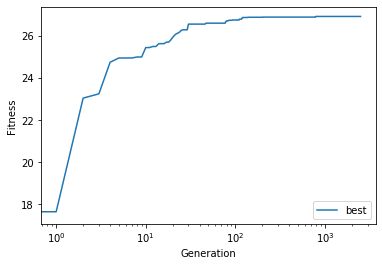

In [320]:
import matplotlib.pyplot as plt
plt.plot(list(range(gen_total)), best_fitness_eachgen, label="best")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.xscale('log')
plt.show()

In [223]:
def main():
    
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

gen	nevals	avg     	min     	max    
0  	100   	-1.89107	-14.9243	12.1741
1  	61    	2.68989 	-9.3921 	12.4922
2  	55    	6.09728 	-5.21448	12.6238
3  	65    	8.47634 	-5.45638	14.3566
4  	61    	10.9535 	-1.15883	15.8038
5  	58    	11.8994 	2.60475 	15.121 
6  	57    	12.9809 	-3.01465	16.2961
7  	67    	13.1255 	-5.12672	16.2961
8  	64    	14.0915 	-0.69709	16.8649
9  	56    	14.9265 	-3.00766	16.8747
10 	52    	15.283  	2.8824  	17.1768
11 	61    	15.9086 	2.79875 	17.3554
12 	59    	16.401  	6.77613 	17.3554
13 	72    	15.5951 	-1.53608	17.3554
14 	61    	16.4387 	-2.6256 	17.4751
15 	58    	16.6613 	0.789776	17.4751
16 	58    	16.7352 	-0.380495	17.6228
17 	66    	16.5892 	0.192109 	17.6228
18 	58    	16.8878 	2.66065  	17.6228
19 	60    	16.4485 	-0.972215	17.6228
20 	59    	16.5541 	2.92246  	17.6501
21 	61    	16.3762 	0.725346 	17.6549
22 	67    	16.7    	1.30225  	17.6549
23 	48    	17.0248 	-0.338587	17.6549
24 	62    	16.7949 	1.44699  	17.7194
25 	52    	16.6153 	-0.544339

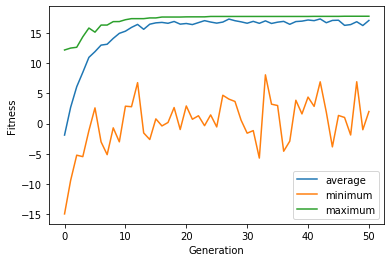

In [224]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()